In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_json("data/alert_data.json")
df

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True
...,...,...,...,...,...,...,...,...,...,...
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9997,OpsRamp agent is offline,Ok,2,P0,1140,Compute,Operating System,Connectivity,Opsramp Cloud Connectivity,False
9998,[Cleared] cca02ris001.cc.nwncloud.com: cca02ri...,Ok,2,P0,58,Others,Others,Others,Others,True


In [3]:
df.columns

Index(['subject', 'currentState', 'repeatCount', 'priority', 'healTime',
       'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory',
       'alert_autoheal'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [5]:
df.describe()

,repeatCount,healTime
count,10000.000000,10000.000000
mean,2.137800,1705.875400
std,0.535014,5683.926477
min,2.000000,1.000000
25%,2.000000,240.000000
50%,2.000000,540.000000
75%,2.000000,900.000000
max,10.000000,76320.000000


In [6]:
df.isnull().sum()

subject             0
currentState        0
repeatCount         0
priority            0
healTime            0
alertClass          0
alertSubClass       0
alertCategory       0
alertSubCategory    0
alert_autoheal      0
dtype: int64

In [7]:
df["currentState"].value_counts()

Ok    10000
Name: currentState, dtype: int64

In [8]:
dd = df["repeatCount"].value_counts()
dd

2     9100
3      620
4      177
5       44
6       43
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

In [9]:
df["priority"].value_counts()

P1    5052
P2    2793
P0    1460
P3     695
Name: priority, dtype: int64

<AxesSubplot:xlabel='priority', ylabel='count'>

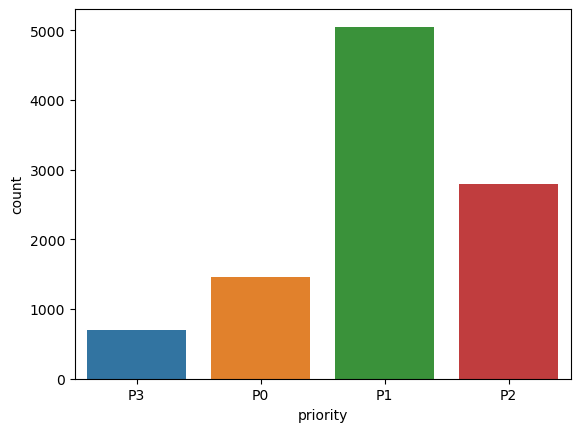

In [10]:
sns.countplot(x=df["priority"])

In [11]:
df["healTime"].value_counts()

540      1365
240      1110
300       998
900       722
60        607
         ... 
20820       1
4620        1
34140       1
7020        1
8280        1
Name: healTime, Length: 328, dtype: int64

<AxesSubplot:ylabel='Density'>

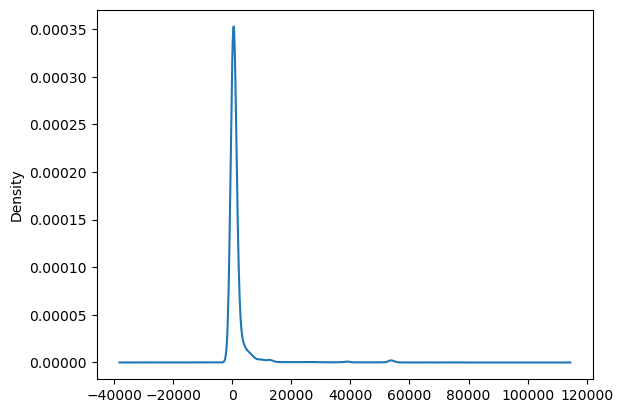

In [12]:
# plot distribution of values in Marks column
df["healTime"].plot(kind='kde')

/tmp/ipykernel_734255/3356269219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['healTime'])


<AxesSubplot:xlabel='healTime', ylabel='Density'>

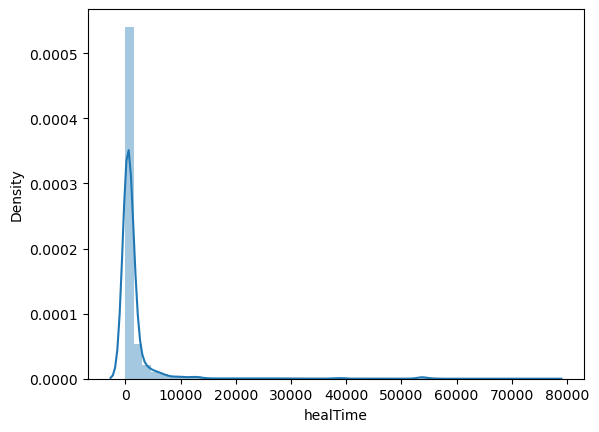

In [13]:
sns.distplot(df['healTime'])

In [14]:
df["alertClass"].value_counts()

Network          4170
Others           2467
Compute          1660
Application      1217
Environment       135
Data              118
Tools             107
Communication      64
Cloud              62
Name: alertClass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='alertClass'>

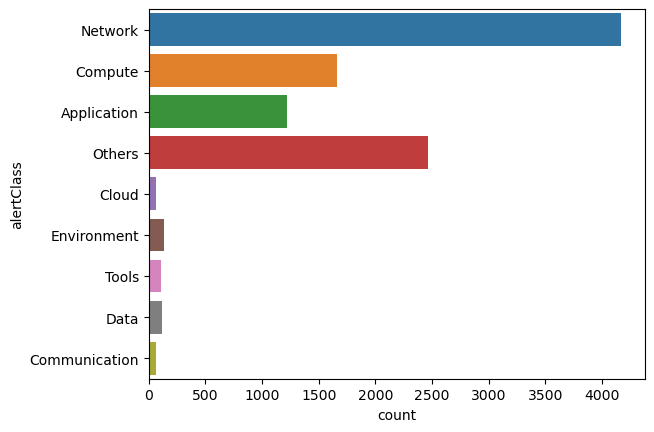

In [15]:
sns.countplot(data=df, y=df["alertClass"])

In [16]:
df["alertSubClass"].value_counts()

Switch                     2594
Others                     2467
Operating System           1247
Wireless                    855
Third Party Application     618
Web Service                 544
Firewall                    410
Virtualization              404
Router                      252
Power                       135
Monitoring                  132
Infra Application            90
Backup                       63
Voice                        61
Generic Device               41
Database                     35
Storage                      20
SDWAN                        14
Hardware                     11
Cloud Instance                4
Collaboration                 3
Name: alertSubClass, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='alertSubClass'>

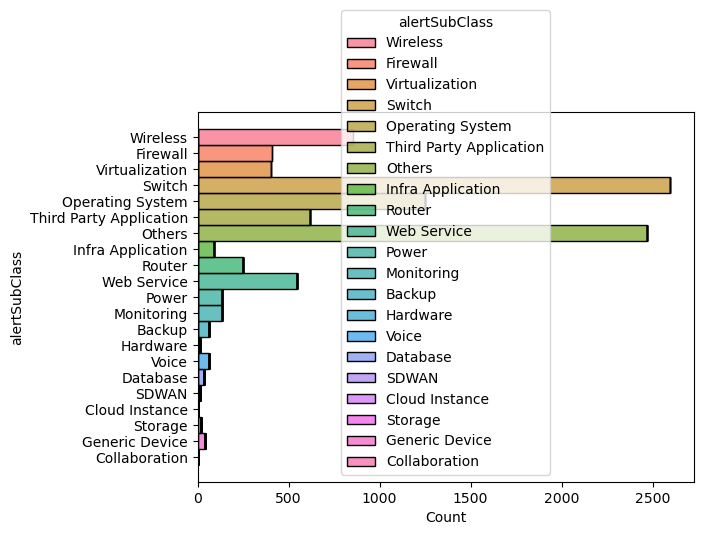

In [17]:
sns.histplot(data=df, y="alertSubClass", hue="alertSubClass", multiple="stack")

In [18]:
df["alertCategory"].value_counts()

Others                2467
Connectivity          2326
Device Status         2064
Device Health         1230
Application Health    1074
Network Interface      407
Application Status     398
Device Management       31
VOIP Link                2
Resource Status          1
Name: alertCategory, dtype: int64

<AxesSubplot:xlabel='alertCategory', ylabel='Count'>

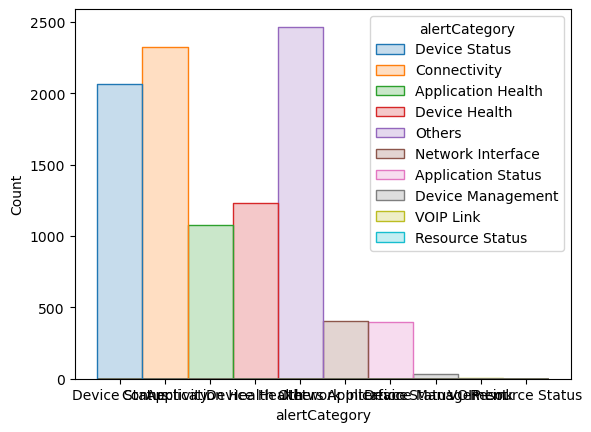

In [19]:
sns.histplot(df, x="alertCategory", hue="alertCategory", element="step")

In [20]:
df["alertSubCategory"].value_counts()

Others                             2467
Monitoring Failure                 1902
Device Down                         952
AP Down                             716
Third Party Application Service     618
                                   ... 
Management Connectivity               1
Resource Down                         1
High Availability                     1
Storagecraft Service Stopped          1
Opsramp Gateway Status                1
Name: alertSubCategory, Length: 69, dtype: int64

In [21]:
print(df["alert_autoheal"].shape)
df["alert_autoheal"].value_counts() # here we got to know we have class imbalance

(10000,)


True     8746
False    1254
Name: alert_autoheal, dtype: int64

### check whether we have duplicate or not

In [22]:
duplicats = df[df.duplicated()]
duplicats.shape

(4762, 10)

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(5238, 10)

### LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']] = \
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']].apply(enc.fit_transform)
df.head()

/tmp/ipykernel_734255/2925873602.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']] = \


,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,Ok,2,3,60,6,20,5,2,1
1,376,Ok,2,0,60,6,4,5,18,1
2,376,Ok,2,0,180,3,17,5,18,1
3,1987,Ok,2,1,240,6,15,2,38,1
4,376,Ok,2,0,59,3,9,5,18,1


In [25]:
df.shape

(5238, 10)

## spliting the data in target and independent column

In [26]:
X = df.drop(["currentState", "alert_autoheal"],axis=1)
y = df.alert_autoheal
X.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,60,6,20,5,2
1,376,2,0,60,6,4,5,18
2,376,2,0,180,3,17,5,18
3,1987,2,1,240,6,15,2,38
4,376,2,0,59,3,9,5,18


In [27]:
# checking whether Label Encoder worker properly or not
X["alertClass"].value_counts()

6    1671
7    1575
3     962
0     657
5     109
4     105
1      54
2      53
8      52
Name: alertClass, dtype: int64

In [28]:
X["priority"].value_counts()

1    2323
2    1627
0     962
3     326
Name: priority, dtype: int64

### Spliting the data in ```Train and test```

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=142)

In [30]:
len(X_train), len(X_test)

(3666, 1572)

In [31]:
y_train.tail(2)

8703    1
464     1
Name: alert_autoheal, dtype: int64

In [32]:
len(y_train), len(y_test)

(3666, 1572)

### checking the model accuracy with imbalance classes

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9586513994910941


col_0,0,1
alert_autoheal,,
0,311,37
1,28,1196


# Data Imbalance correction

In [35]:
#pip install imblearn

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
X_smote, y_smote = smote.fit_resample(X.astype('float'),y) # without floating value accuracy will decrease

In [38]:
y_smote.value_counts()

1    4113
0    4113
Name: alert_autoheal, dtype: int64

In [39]:
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_smote))

Before SMOTE : Counter({1: 4113, 0: 1125})
After SMOTE : Counter({1: 4113, 0: 4113})


In [40]:
X_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

### check duplicates after balancing 

In [41]:
smote_dup = X_smote[X_smote.duplicated()]
smote_dup.shape

(0, 8)

### Spliting data after balance it

In [42]:
from sklearn.model_selection import train_test_split
X_train_smote,X_test_smote, y_train_smote,y_test_smote = \
train_test_split(X_smote,y_smote,test_size=0.3,random_state=142)

In [43]:
X_train_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

In [44]:
len(X_train_smote["healTime"]) # I'm checking here whether it has increased healTime's values or not

5758

In [45]:
len(X_train_smote), len(X_test_smote)

(5758, 2468)

In [46]:
len(y_train_smote),len(y_test_smote)

(5758, 2468)

In [47]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_predict))
pd.crosstab(y_test_smote,y_predict) # Compute a simple cross tabulation of two (or more) factors.

0.9708265802269044


col_0,0,1
alert_autoheal,,
0,1212,26
1,46,1184


## Using classification model for getting ```Auto Heal```

In [48]:
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [49]:
import pickle
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

rbf = radial basis function kernel

In [50]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

In [51]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc =[]
Precision = []
Recall = []
F1 = []
report = []
val_ac = {}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train_smote,y_train_smote)
    pred=classification_model.predict(X_test_smote)
    acc.append(accuracy_score(pred,y_test_smote))
    Precision.append(precision_score(pred, y_test_smote))
    Recall.append(recall_score(pred, y_test_smote))
    F1.append(f1_score(pred, y_test_smote))
    report.append(classification_report(pred, y_test_smote))
    
    
     
val_acc={'Modelling Algorithm':model_names,'Accuracy':acc, "Precision":Precision, "Recall":Recall, "F1":F1}
val_acc

/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9764991896272285,
  0.8869529983792545,
  0.9080226904376013,
  0.9708265802269044,
  0.9983792544570502,
  0.9991896272285251,
  0.9995948136142626,
  0.8942463533225283],
 'Precision': [0.9723577235772358,
  0.7739837398373983,
  0.9317073170731708,
  0.9626016260162602,
  0.9983739837398374,
  0.9991869918699187,
  1.0,
  0.9658536585365853],
 'Recall': [0.980327868852459,
  0.9989506820566632,
  0.8890612878200155,
  0.9785123966942149,
  0.9983739837398374,
  0.9991869918699187,
  0.9991876523151909,
  0.8443496801705757],
 'F1': [0.9763265306122448,
  0.8721942281264314,
  0.9098848749503771,
  0.9704918032786886,
  0.9983739837398374,
  0.9991869918699187,
  0.9995936611133686,
  0.9010238907849829]}

In [52]:
acc_table=pd.DataFrame(val_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy,Precision,Recall,F1
6,GradientBoostingClassifier,0.999595,1.000000,0.999188,0.999594
5,DecisionTree,0.999190,0.999187,0.999187,0.999187
4,RandomForestClassifier,0.998379,0.998374,0.998374,0.998374
0,LogisticRegression,0.976499,0.972358,0.980328,0.976327
3,KNearestNeighbors,0.970827,0.962602,0.978512,0.970492
2,rbfSVM,0.908023,0.931707,0.889061,0.909885
7,GaussianNB,0.894246,0.965854,0.844350,0.901024
1,LinearSVM,0.886953,0.773984,0.998951,0.872194


#### Accuracy comparession

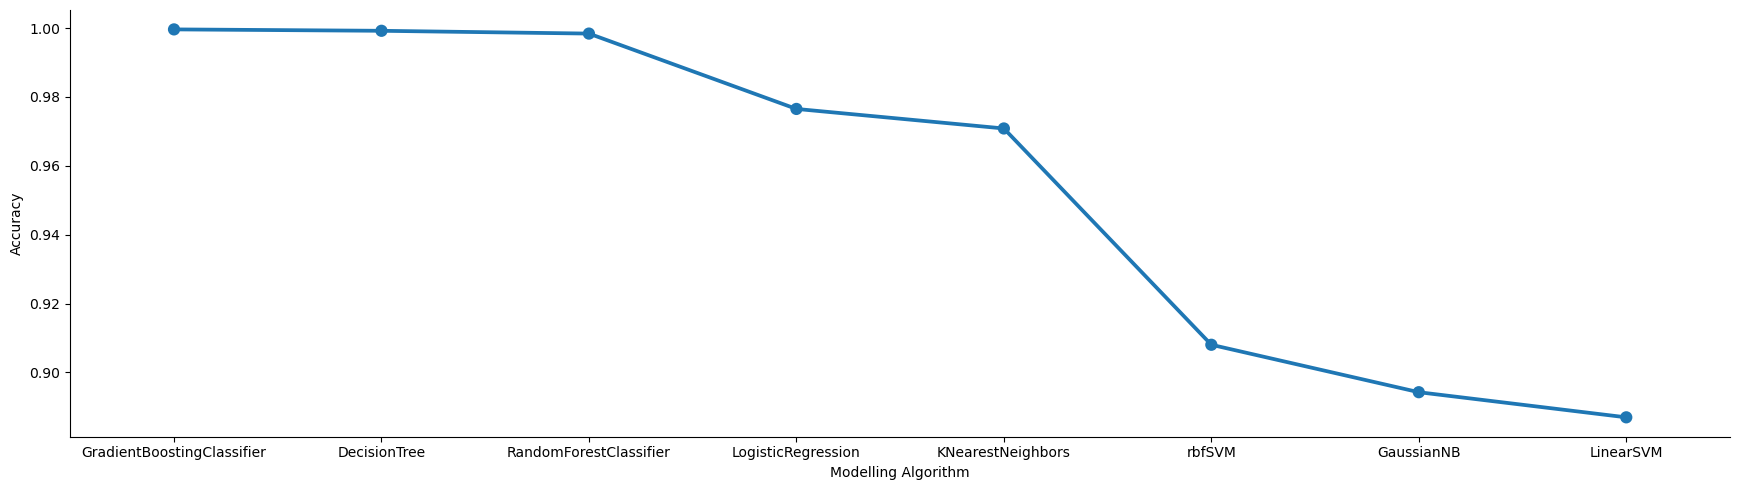

In [53]:
sns.catplot(x='Modelling Algorithm',y='Accuracy',data=acc_table,kind='point',aspect=3.5)

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

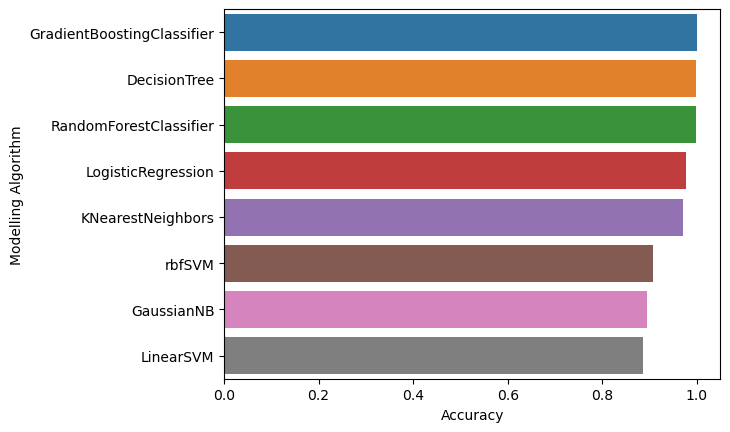

In [54]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

#### Precision comparession

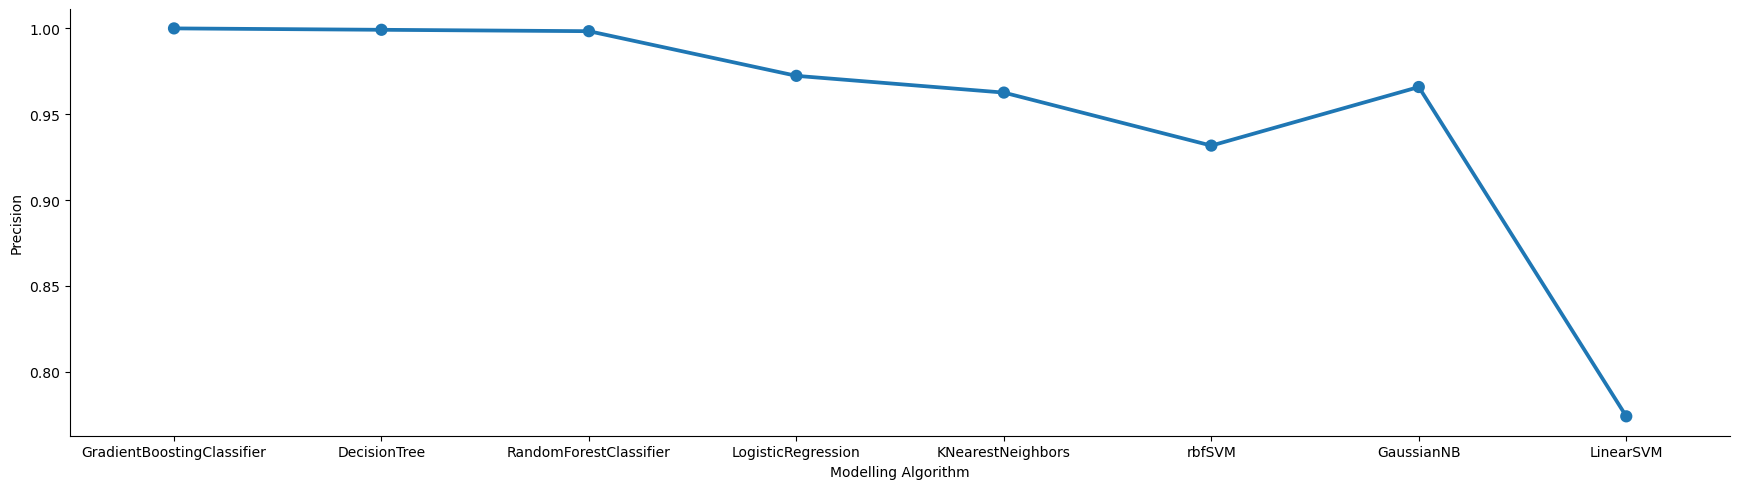

In [55]:
sns.catplot(x='Modelling Algorithm',y='Precision',data=acc_table,kind='point',aspect=3.5)

#### Recall comparision

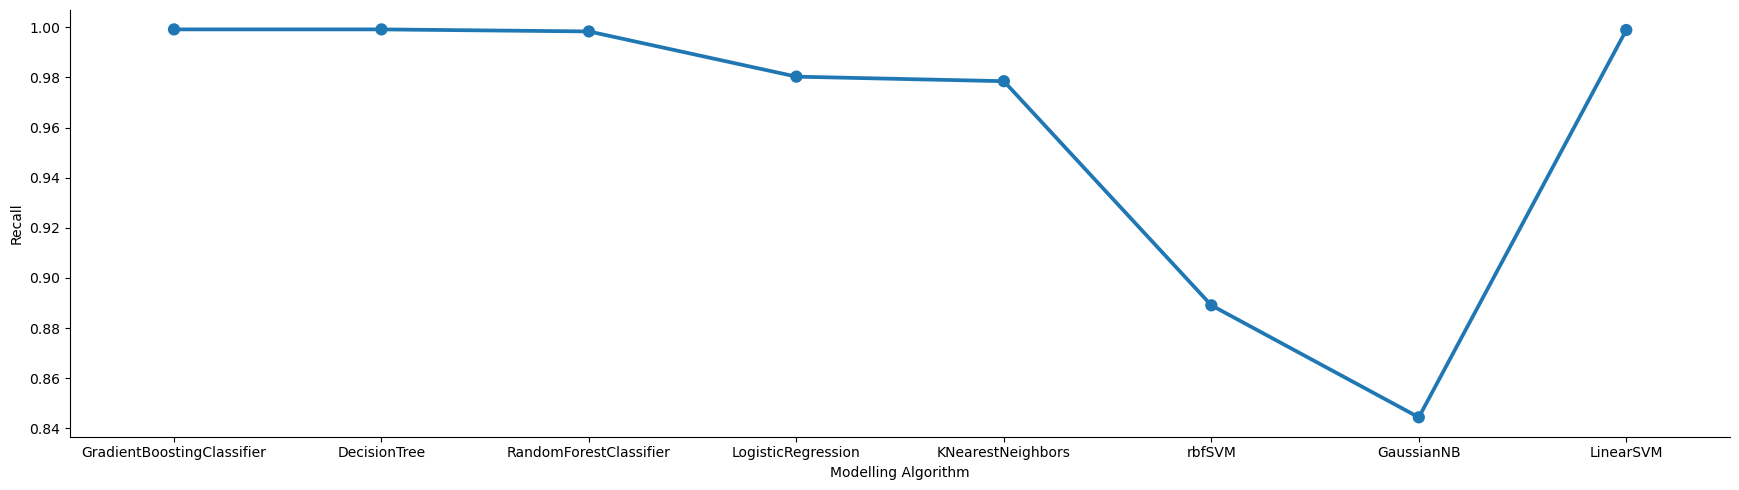

In [56]:
sns.catplot(x='Modelling Algorithm',y='Recall',data=acc_table,kind='point',aspect=3.5)

#### F1 comparession

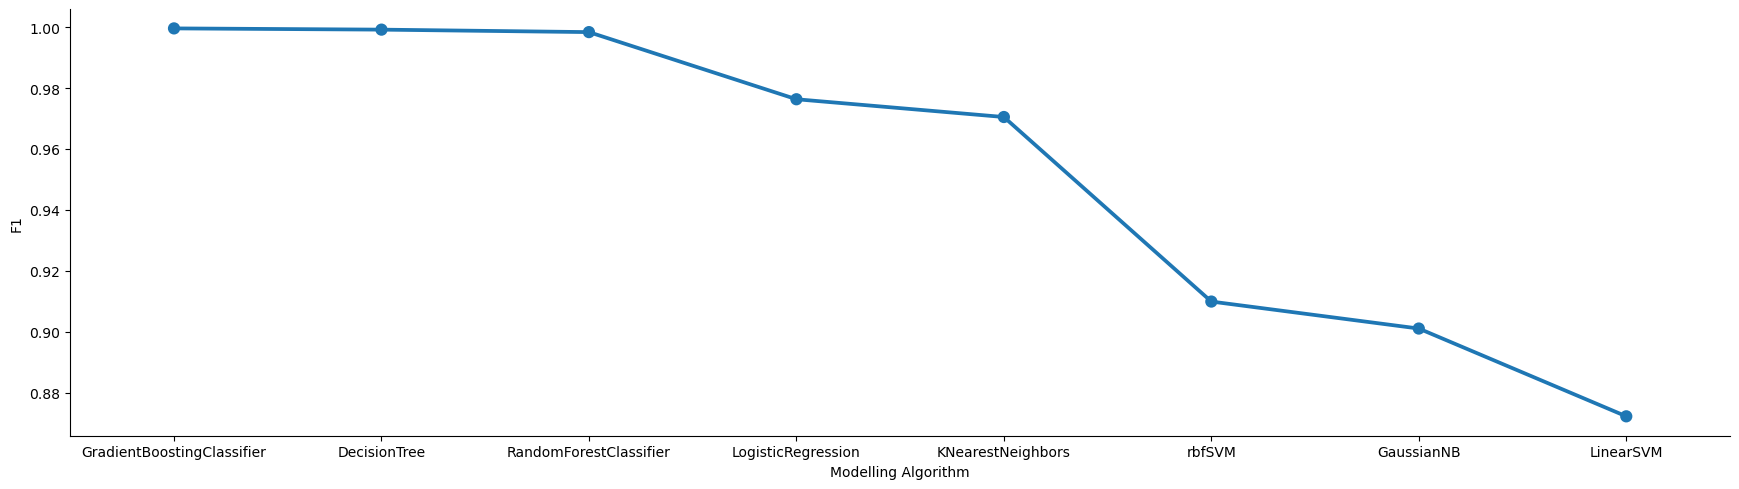

In [57]:
sns.catplot(x='Modelling Algorithm',y='F1',data=acc_table,kind='point',aspect=3.5)

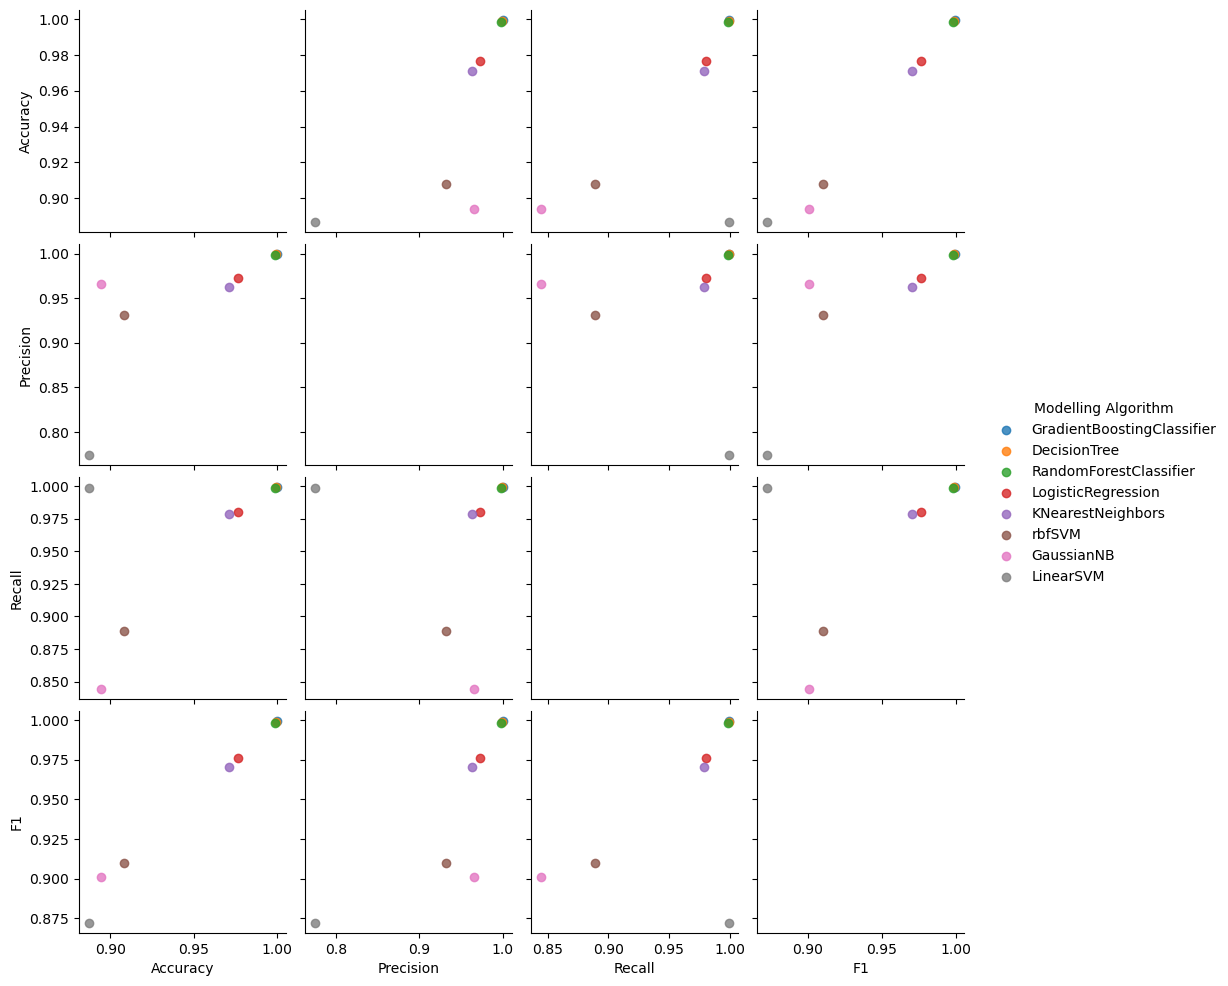

In [58]:
sns.pairplot(data=acc_table, hue='Modelling Algorithm', kind='reg') #'scatter', 'kde', 'hist', 'reg'

In [59]:
for i in report:
    print(i)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1248
           1       0.97      0.98      0.98      1220

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1515
           1       0.77      1.00      0.87       953

    accuracy                           0.89      2468
   macro avg       0.89      0.91      0.89      2468
weighted avg       0.91      0.89      0.89      2468

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1179
           1       0.93      0.89      0.91      1289

    accuracy                           0.91      2468
   macro avg       0.91      0.91      0.91      2468
weighted avg       0.91      0.91      0.91      2468

              preci

In [60]:
# import pickle
# saved_model = pickle.dumps(knn)
# knn_from_pickle = pickle.loads(saved_model)
# knn_from_pickle.predict(X_test_smote)

In [61]:
f

NameError: name 'f' is not defined

### checking outlier on ```healTime``` column

In [62]:
X_smote["healTime"].tail(3)

8223    9742.836416
8224    1020.000000
8225    2671.577781
Name: healTime, dtype: float64

<AxesSubplot:xlabel='healTime'>

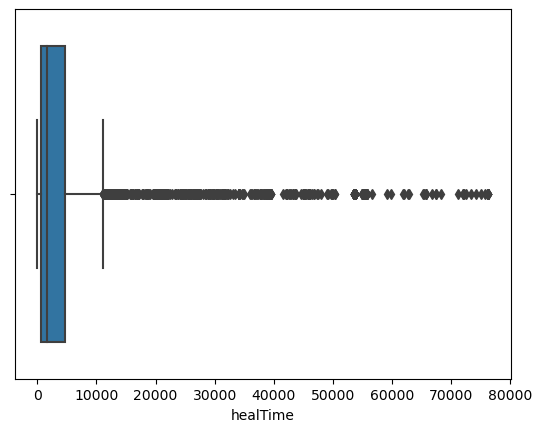

In [63]:
# Box plot
sns.boxplot(x=X_smote["healTime"])

<AxesSubplot:xlabel='healTime'>

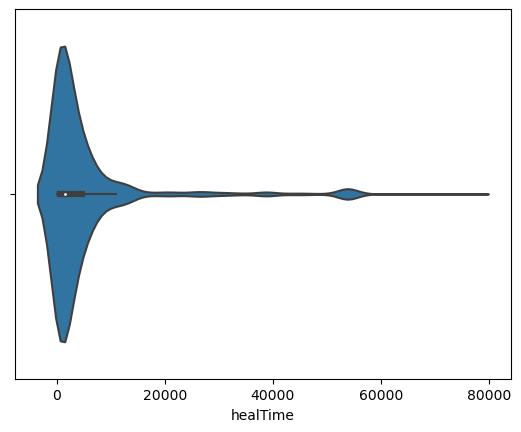

In [64]:
# Violinplot
sns.violinplot(x=X_smote["healTime"])

In [65]:
# descriptive statistics of healTime
a = df["healTime"].describe()
b = X_smote["healTime"].describe()
print(a,'\n', b)

count     5238.000000
mean      2738.024628
std       7543.267620
min          1.000000
25%        300.000000
50%        840.000000
75%       1785.000000
max      76320.000000
Name: healTime, dtype: float64 
 count     8226.000000
mean      5327.888369
std      10782.204117
min          1.000000
25%        540.000000
50%       1620.000000
75%       4740.000000
max      76320.000000
Name: healTime, dtype: float64


In [66]:
# Checking frequency of subcatagory under
c = df["healTime"].value_counts()
d = X_smote["healTime"].value_counts()
print(c, "\n", d)

900      542
300      431
240      346
840      321
60       276
        ... 
10320      1
36600      1
39         1
39420      1
8280       1
Name: healTime, Length: 328, dtype: int64 
 900.000000      542
300.000000      431
240.000000      346
840.000000      321
60.000000       276
               ... 
2802.907611       1
7543.712421       1
3602.291252       1
20149.921178      1
2671.577781       1
Name: healTime, Length: 2095, dtype: int64


In [67]:
# Checking lessthan 1
e = (df["healTime"]<= 1).value_counts()
f = (X_smote["healTime"]<= 1).value_counts()
print(e,"\n", f)

False    5233
True        5
Name: healTime, dtype: int64 
 False    8221
True        5
Name: healTime, dtype: int64


In [68]:
# Checking Greaterthan 60000
g = (df["healTime"]<= 60000).value_counts()
h = (X_smote["healTime"]<= 60000).value_counts()
print(g, "\n", h)

True     5231
False       7
Name: healTime, dtype: int64 
 True     8195
False      31
Name: healTime, dtype: int64


## Feature Selection

/tmp/ipykernel_734255/54153052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # 'pearson', 'kendall', 'spearman'


<AxesSubplot:>

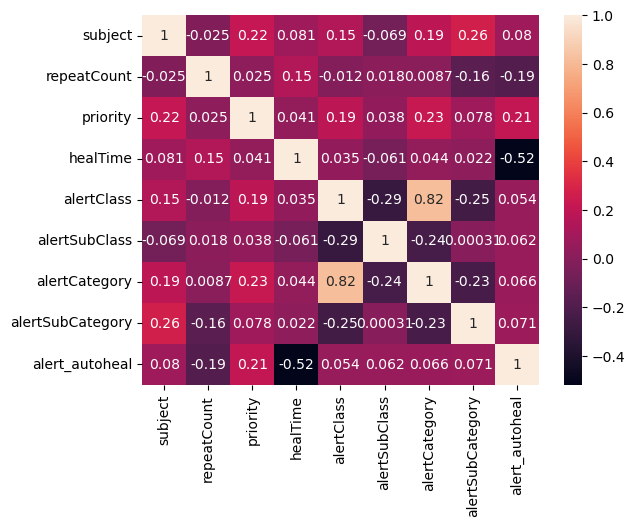

In [69]:
sns.heatmap(df.corr(), annot=True) # 'pearson', 'kendall', 'spearman'

In [70]:
from scipy.stats import pearsonr

def get_correlation(column1, column2, X_smote):
    pearson_corr, p_value = pearsonr(X_smote[column1], X_smote[column2])
    print(f"Correlation b/w {column1} and {column2} is {pearson_corr}")
    print(f"P-value of this correlation is {p_value}")

### Concatenation for Regression

In [71]:
X_smote.shape, y_smote.shape

((8226, 8), (8226,))

In [72]:
smote=pd.concat([X_smote, y_smote], axis=1)
smote.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [73]:
smote.shape

(8226, 9)

<AxesSubplot:>

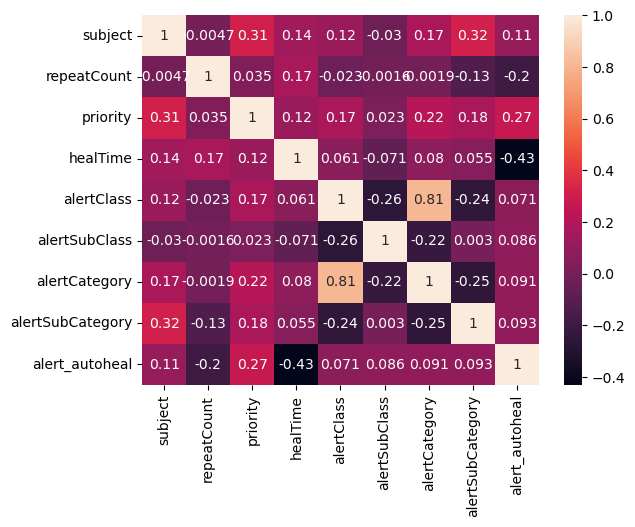

In [74]:
sns.heatmap(smote.corr(), annot=True)

In [75]:
get_correlation('alertClass','alertCategory', smote)

Correlation b/w alertClass and alertCategory is 0.8089002011916461
P-value of this correlation is 0.0


In [76]:
get_correlation('healTime','alertCategory', X_smote)

Correlation b/w healTime and alertCategory is 0.08036411282838533
P-value of this correlation is 2.888209224909957e-13


OLS

In [77]:
import statsmodels.api as sm

In [78]:
X_smote_cont = sm.add_constant(smote)
X_smote_cont.head()

,const,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,1.0,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,1.0,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1.0,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,1.0,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [79]:
X_smote_cont.shape

(8226, 10)

In [80]:
X_ols = X_smote_cont.drop(["alert_autoheal"],axis=1)
y_ols = X_smote_cont["alert_autoheal"]

In [81]:
X_ols.head()

,const,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,1.0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0
1,1.0,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0
2,1.0,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0
3,1.0,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0
4,1.0,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0


In [82]:
y_ols.head()

0    1
1    1
2    1
3    1
4    1
Name: alert_autoheal, dtype: int64

In [83]:
model= sm.OLS(y_ols, X_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         alert_autoheal   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     485.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:26:36   Log-Likelihood:                -4379.5
No. Observations:                8226   AIC:                             8777.
Df Residuals:                    8217   BIC:                             8840.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3248      0.028     11.596      0.000       0.270       0.380
subject           2.885e-05   5.19e-06      5.553      0.000    1.87e-05     3.9e-05
repeatCount         -0.0782      0.006    -12.864      0.000      -0.090      -0.066
priority             0.1698      0.006     28.312      0.000       0.158       0.182
healTime         -2.121e-05   4.35e-07    -48.723      0.000   -2.21e-05   -2.04e-05
alertClass           0.0018      0.003      0.526      0.599      -0.005       0.009
alertSubClass        0.0079      0.001      7.144      0.000       0.006       0.010
alertCategory        0.0173      0.003      4.997      0.000       0.010       0.024
alertSubCategory     0.0017      0.000      5.383      0.000       0.001       0.002
==============================================================================
Omnibus:                    13641.702   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.799
Skew:                          -0.101   Prob(JB):                    1.24e-121
Kurtosis:                       1.741   Cond. No.                     7.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

```Variance Inflation Factor (VIF) is a metric used to detect the presence of multicollinearity in regression models. High VIF values indicate that there is a high degree of correlation between predictor variables, which can lead to unstable and unreliable coefficient estimates in the regression model.```

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [109]:
smote

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.000000,2.0,3.000000,60.000000,6.000000,20.000000,5.000000,2.000000,1
1,376.000000,2.0,0.000000,60.000000,6.000000,4.000000,5.000000,18.000000,1
2,376.000000,2.0,0.000000,180.000000,3.000000,17.000000,5.000000,18.000000,1
3,1987.000000,2.0,1.000000,240.000000,6.000000,15.000000,2.000000,38.000000,1
4,376.000000,2.0,0.000000,59.000000,3.000000,9.000000,5.000000,18.000000,1
...,...,...,...,...,...,...,...,...,...
8221,1741.222763,2.0,0.653970,3341.523545,2.076177,17.384118,1.730148,39.276316,0
8222,338.684807,2.0,0.581280,4174.876795,6.000000,10.812799,5.581280,24.975359,0
8223,356.798815,2.0,0.077424,9742.836416,5.535455,4.929090,4.612879,21.174389,0
8224,392.223686,2.0,0.000000,1020.000000,6.862782,8.227444,5.000000,18.000000,0


In [110]:
smote.iloc[:,:-1]

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836.000000,2.0,3.000000,60.000000,6.000000,20.000000,5.000000,2.000000
1,376.000000,2.0,0.000000,60.000000,6.000000,4.000000,5.000000,18.000000
2,376.000000,2.0,0.000000,180.000000,3.000000,17.000000,5.000000,18.000000
3,1987.000000,2.0,1.000000,240.000000,6.000000,15.000000,2.000000,38.000000
4,376.000000,2.0,0.000000,59.000000,3.000000,9.000000,5.000000,18.000000
...,...,...,...,...,...,...,...,...
8221,1741.222763,2.0,0.653970,3341.523545,2.076177,17.384118,1.730148,39.276316
8222,338.684807,2.0,0.581280,4174.876795,6.000000,10.812799,5.581280,24.975359
8223,356.798815,2.0,0.077424,9742.836416,5.535455,4.929090,4.612879,21.174389
8224,392.223686,2.0,0.000000,1020.000000,6.862782,8.227444,5.000000,18.000000


In [112]:
df_vif = smote
calc_vif(df_vif)

,variables,VIF
0,subject,4.485753
1,repeatCount,7.145246
2,priority,3.679344
3,healTime,1.708415
4,alertClass,14.522650
5,alertSubClass,6.266355
6,alertCategory,12.951536
7,alertSubCategory,5.431801
8,alert_autoheal,2.897107


### Finaly we have taken decision to remove ```alertClass``` column

In [115]:
df_reg = smote.drop(['alertClass'],axis=1)
calc_vif(df_reg)

,variables,VIF
0,subject,4.485739
1,repeatCount,6.934914
2,priority,3.679343
3,healTime,1.708308
4,alertSubClass,6.254859
5,alertCategory,4.102342
6,alertSubCategory,5.390054
7,alert_autoheal,2.890244


In [116]:
df_reg

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.000000,2.0,3.000000,60.000000,20.000000,5.000000,2.000000,1
1,376.000000,2.0,0.000000,60.000000,4.000000,5.000000,18.000000,1
2,376.000000,2.0,0.000000,180.000000,17.000000,5.000000,18.000000,1
3,1987.000000,2.0,1.000000,240.000000,15.000000,2.000000,38.000000,1
4,376.000000,2.0,0.000000,59.000000,9.000000,5.000000,18.000000,1
...,...,...,...,...,...,...,...,...
8221,1741.222763,2.0,0.653970,3341.523545,17.384118,1.730148,39.276316,0
8222,338.684807,2.0,0.581280,4174.876795,10.812799,5.581280,24.975359,0
8223,356.798815,2.0,0.077424,9742.836416,4.929090,4.612879,21.174389,0
8224,392.223686,2.0,0.000000,1020.000000,8.227444,5.000000,18.000000,0


In [162]:
X_final_df = df_reg.drop(['healTime'], axis=1)
y_final_df = df_reg['healTime']

In [163]:
X_final_df.ndim

2

In [164]:
y_final_df.ndim

1

In [165]:
X_final_df.shape, y_final_df.shape

((8226, 7), (8226,))

In [166]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final_df, y_final_df, test_size=.02, random_state=142)

In [167]:
X_train_f.shape, X_test_f.ndim

((8061, 7), 2)

In [168]:
y_train_f.shape, y_test_f.ndim

((8061,), 1)

In [204]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor # df >=10000

In [247]:
reg_models = [AdaBoostRegressor(),
          BaggingRegressor(),
            RandomForestRegressor(),
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          HistGradientBoostingRegressor()    
]

#### AdaBoostRegressor

In [248]:
ada = reg_models[0]
print(ada)
ada.fit(X_train_f, y_train_f)
ada.predict(X_test_f[:5])

AdaBoostRegressor()


array([ 677.44135507,  677.44135507, 1263.59450172,  677.44135507,
        677.44135507])

In [249]:
ada.score(X_test_f, y_test_f)

0.6548364866571035

#### BaggingRegressor

In [250]:
bag = reg_models[1]
print(bag)
bag.fit(X_train_f, y_train_f)
bag.predict(X_test_f[:5])

BaggingRegressor()


array([ 186. ,  852. , 1260. ,  841.5,  570. ])

In [251]:
bag.score(X_test_f, y_test_f)

0.8854006712401676

#### RandomForestRegressor

In [252]:
rand = reg_models[2]
print(rand)
rand.fit(X_train_f, y_train_f)
rand.predict(X_test_f[:5])

RandomForestRegressor()


array([ 221.4       ,  853.8       , 1697.4       ,  673.16071429,
        599.57      ])

In [253]:
rand.score(X_test_f, y_test_f)

0.8951660578360823

#### ExtraTreesRegressor

In [254]:
ETR = reg_models[3]
print(ETR)
ETR.fit(X_train_f, y_train_f)
ETR.predict(X_test_f[:5])

ExtraTreesRegressor()


array([ 186.6,  867.6, 1752. ,  700. ,  705. ])

In [255]:
ETR.score(X_test_f, y_test_f)

0.8763124436636195

#### GradientBoostingRegressor

In [256]:
GBR = reg_models[4]
print(GBR)
GBR.fit(X_train_f, y_train_f)
GBR.predict(X_test_f[:5])

GradientBoostingRegressor()


array([ 780.13544739,  688.01995433, 4451.3160002 , 1029.3652961 ,
        775.53407241])

In [257]:
GBR.score(X_test_f, y_test_f)

0.8678359115191282

#### HistGradientBoostingRegressor

In [261]:
HGBR = reg_models[5]
print(HGBR)
HGBR.fit(X_train_f, y_train_f)
HGBR.predict(X_test_f[:5])

HistGradientBoostingRegressor()


array([665.67094701, 809.35035901, 488.66024542, 693.87851297,
       797.45926284])

In [262]:
HGBR.score(X_test_f, y_test_f)

0.8988359506309833

In [264]:
X_test_f[:5]

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
9,432.0,2.0,2.0,15.0,5.0,18.0,1
1575,2706.0,2.0,1.0,10.0,7.0,42.0,1
1695,1096.0,3.0,1.0,10.0,7.0,42.0,1
220,1202.0,2.0,1.0,17.0,3.0,35.0,1
4666,2916.0,2.0,2.0,10.0,7.0,42.0,1


In [263]:
y_test_f[:5]

/tmp/ipykernel_734255/2195888454.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test_f[:5]


9        180.0
1575     900.0
1695    1500.0
220      900.0
4666    3000.0
Name: healTime, dtype: float64

In [265]:
### I need to seek for homoscadiacity and hetrogenecity

In [ ]:
d

In [174]:
from sklearn.neural_network import MLPRegressor

In [198]:
regr = MLPRegressor(random_state=142, max_iter=10000).fit(X_train_f, y_train_f)

In [199]:
regr.predict(X_test_f[:5])

array([ 852.42165684, 1004.12282035,  352.46379104, -816.89755539,
       2498.67215267])

In [200]:
regr.score(X_test_f, y_test_f)

0.3168140240003532